<a href="https://colab.research.google.com/github/aisaza609/Datos_a_la_U_grupo_2/blob/main/interoperabilidad_sistema_recomendacion_dataset__Hospitalarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import io
from io import BytesIO
import random
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline

# Dataset de Pitalito Hospital Nivel 2

Morbilidad en el hospital "Morbilidad urgencias Hospital Pitalito" 	Hospital Departamental San Antonio, Pitalito NIVEL 2. [DATASET PITALITO](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Morbilidad-urgencias-Hospital-Pitalito/ekrt-9aay/about_data)

In [44]:
# URL del archivo .csv en GitHub
url_csv1 = 'https://raw.githubusercontent.com/aisaza609/Datos_a_la_U_grupo_2/refs/heads/main/Dataset%20de%20datos%20abiertos/Morbilidad_urgencias_Hospital_Pitalito.csv'

# Descargar y cargar el archivo .csv
response_csv = requests.get(url_csv1)
if response_csv.status_code == 200:
    tg_pitalito = pd.read_csv(BytesIO(response_csv.content))
    tg_pitalito.head()
else:
    print("No se pudo descargar el archivo .csv.")
tg_pitalito.head()

,Periodo,Ingreso,FechaIngreso,Triage,Unidad,FechaHistoria,EspecialidadMedico,Entidad,DxSindromatico,CodigoDiagnostico,...,Sexo,FechaNacimiento,GrupoEtario1,GrupoEtario2,TipoRegimen,Edad,UnidadEdad,MunicipioRes,BarrioVereda,Direccion
0,01/01/2023 12:00:00 AM,2795237,01/31/2023 11:23:22 PM,3,URGENCIAS TRAUMA Y PROCEDIMIENTOS,01/31/2023 11:29:41 PM,MEDICINA GENERAL,NUEVA EPS,CONTUSIONES,S019,...,Masculino,01/31/1998 12:00:00 AM,Entre 15 y 44,Entre 25 y 29,Subsidiado,25,Años,41551,PANORAMA,CALLE 8 SUR N 1 6- 60
1,01/01/2023 12:00:00 AM,2795236,01/31/2023 11:15:32 PM,3,URGENCIAS CONSULTA Y PROCEDIMIENTOS,01/31/2023 11:22:39 PM,MEDICINA GENERAL,ASMET SALUD CONTRIBUTIVO,DOLOR ABDOMINAL CONSTANTE,R104,...,Femenino,10/05/1986 12:00:00 AM,Entre 15 y 44,Entre 35 y 39,Subsidiado,36,Años,41668,VEREDA,VEREDA LA PARDERA
2,01/01/2023 12:00:00 AM,2795235,01/31/2023 11:12:51 PM,3,URGENCIAS CONSULTA Y PROCEDIMIENTOS,01/31/2023 11:21:09 PM,MEDICINA GENERAL,NUEVA EPS,DOLOR TORAXICO,R073,...,Masculino,06/07/1999 12:00:00 AM,Entre 15 y 44,Entre 20 y 24,Contributivo,23,Años,41551,BARRIO GENERAL,CONJUNTO LA CASTELLANA- NO SABE NOMENCLATURA
3,01/01/2023 12:00:00 AM,2795234,01/31/2023 11:08:26 PM,3,URGENCIAS TRAUMA Y PROCEDIMIENTOS,01/31/2023 11:17:18 PM,MEDICINA GENERAL,NUEVA EPS,LESIONES POR VIOLENCIA,R456,...,Femenino,04/20/2004 12:00:00 AM,Entre 15 y 44,Entre 15 y 19,Subsidiado,18,Años,41551,HACIENDA DE LABOYOS - VDA -,VEREDA HACIENDA LABOYOS
4,01/01/2023 12:00:00 AM,2795231,01/31/2023 10:51:07 PM,3,URGENCIAS CONSULTA Y PROCEDIMIENTOS,01/31/2023 11:08:50 PM,MEDICINA GENERAL,UNION TEMPORAL TOLIHUILA,DOLOR AGUDO,I872,...,Masculino,07/03/1947 12:00:00 AM,Mayores de 60,Entre 75 y 79,Otro,75,Años,41551,CALAMO,CARRERA 14 A NO. 8 - 05


In [45]:
tg_pitalito.columns.tolist() #mostramos los nombres de las columnas

['Periodo',
 'Ingreso',
 'FechaIngreso',
 'Triage',
 'Unidad',
 'FechaHistoria',
 'EspecialidadMedico',
 'Entidad',
 'DxSindromatico',
 'CodigoDiagnostico',
 'NombreDiagnostico',
 'Sexo',
 'FechaNacimiento',
 'GrupoEtario1',
 'GrupoEtario2',
 'TipoRegimen',
 'Edad',
 'UnidadEdad',
 'MunicipioRes',
 'BarrioVereda',
 'Direccion']

In [46]:
print(" \nDataset shape (rows, cols): \n\n",
      tg_pitalito.shape)
print(" \nCount total NaN at each column in the dataset : \n\n",
      tg_pitalito.isnull().sum())

 
Dataset shape (rows, cols): 

 (59025, 21)
 
Count total NaN at each column in the dataset : 

 Periodo               0
Ingreso               0
FechaIngreso          0
Triage                0
Unidad                0
FechaHistoria         0
EspecialidadMedico    0
Entidad               0
DxSindromatico        0
CodigoDiagnostico     0
NombreDiagnostico     0
Sexo                  0
FechaNacimiento       0
GrupoEtario1          0
GrupoEtario2          0
TipoRegimen           0
Edad                  0
UnidadEdad            3
MunicipioRes          0
BarrioVereda          0
Direccion             0
dtype: int64


In [47]:
# Agregar una nueva columna 'NivelHospital' con valor 'Nivel 2' en todo el dataset
tg_pitalito['NivelHospital'] = '2'


## NORMALIZACION DE LOS DATOS

Para garantizar la interoperabilidad y el correcto envío de la información, normalizamos los datasets para incluir solo la información más relevante. Los atributos adicionales serán eliminados, y aquellos faltantes se completarán utilizando datos abiertos y datasets externos. Los atributos clave serán: tipo de documento, número de documento, fecha de ingreso, código de ingreso, edad, CIE-10, nombre del diagnóstico, descripción del diagnóstico, servicio de remisión, EPS, género, municipio, nivel hospitalario, nivel requerido y traslado.

### Codigo de Ingreso

In [48]:
# Cmabiamos le nombre de la columna
tg_pitalito.rename(columns={'Ingreso': 'CdIngreso'})


,Periodo,CdIngreso,FechaIngreso,Triage,Unidad,FechaHistoria,EspecialidadMedico,Entidad,DxSindromatico,CodigoDiagnostico,...,FechaNacimiento,GrupoEtario1,GrupoEtario2,TipoRegimen,Edad,UnidadEdad,MunicipioRes,BarrioVereda,Direccion,NivelHospital
0,01/01/2023 12:00:00 AM,2795237,01/31/2023 11:23:22 PM,3,URGENCIAS TRAUMA Y PROCEDIMIENTOS,01/31/2023 11:29:41 PM,MEDICINA GENERAL,NUEVA EPS,CONTUSIONES,S019,...,01/31/1998 12:00:00 AM,Entre 15 y 44,Entre 25 y 29,Subsidiado,25,Años,41551,PANORAMA,CALLE 8 SUR N 1 6- 60,2
1,01/01/2023 12:00:00 AM,2795236,01/31/2023 11:15:32 PM,3,URGENCIAS CONSULTA Y PROCEDIMIENTOS,01/31/2023 11:22:39 PM,MEDICINA GENERAL,ASMET SALUD CONTRIBUTIVO,DOLOR ABDOMINAL CONSTANTE,R104,...,10/05/1986 12:00:00 AM,Entre 15 y 44,Entre 35 y 39,Subsidiado,36,Años,41668,VEREDA,VEREDA LA PARDERA,2
2,01/01/2023 12:00:00 AM,2795235,01/31/2023 11:12:51 PM,3,URGENCIAS CONSULTA Y PROCEDIMIENTOS,01/31/2023 11:21:09 PM,MEDICINA GENERAL,NUEVA EPS,DOLOR TORAXICO,R073,...,06/07/1999 12:00:00 AM,Entre 15 y 44,Entre 20 y 24,Contributivo,23,Años,41551,BARRIO GENERAL,CONJUNTO LA CASTELLANA- NO SABE NOMENCLATURA,2
3,01/01/2023 12:00:00 AM,2795234,01/31/2023 11:08:26 PM,3,URGENCIAS TRAUMA Y PROCEDIMIENTOS,01/31/2023 11:17:18 PM,MEDICINA GENERAL,NUEVA EPS,LESIONES POR VIOLENCIA,R456,...,04/20/2004 12:00:00 AM,Entre 15 y 44,Entre 15 y 19,Subsidiado,18,Años,41551,HACIENDA DE LABOYOS - VDA -,VEREDA HACIENDA LABOYOS,2
4,01/01/2023 12:00:00 AM,2795231,01/31/2023 10:51:07 PM,3,URGENCIAS CONSULTA Y PROCEDIMIENTOS,01/31/2023 11:08:50 PM,MEDICINA GENERAL,UNION TEMPORAL TOLIHUILA,DOLOR AGUDO,I872,...,07/03/1947 12:00:00 AM,Mayores de 60,Entre 75 y 79,Otro,75,Años,41551,CALAMO,CARRERA 14 A NO. 8 - 05,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59020,01/01/2023 12:00:00 AM,3000496,12/27/2023 12:03:54 PM,3,URGENCIAS CONSULTA Y PROCEDIMIENTOS,12/27/2023 01:51:10 PM,MEDICINA GENERAL,ASMET SALUD CONTRIBUTIVO,CAMBIOS GRADUALES DE VISION NO SUBITOS,H545,...,01/08/2004 12:00:00 AM,Entre 15 y 44,Entre 20 y 24,Desplazado reg Subsidiado,20,Años,41551,VEINTE DE JULIO,CARRERA 17 A NO. 19 - 53,2
59021,01/01/2023 12:00:00 AM,2999652,12/22/2023 03:37:21 PM,3,URGENCIAS CONSULTA Y PROCEDIMIENTOS,12/22/2023 03:48:56 PM,MEDICINA GENERAL,E.P.S. SANITAS CONTRIBUTIVO.,PERDIDA SUBITA DE VISION,H545,...,04/18/1991 12:00:00 AM,Entre 15 y 44,Entre 30 y 34,Subsidiado,33,Años,41006,VEREDA,VEREDA EL CARMEN - ACEVEDO,2
59022,01/01/2023 12:00:00 AM,2974391,10/12/2023 10:07:42 AM,3,URGENCIAS CONSULTA Y PROCEDIMIENTOS,10/12/2023 10:49:07 AM,MEDICINA GENERAL,E.P.S. SANITAS CONTRIBUTIVO.,DOLOR ABDOMINAL CON DIARREA Y DHT,P920,...,10/25/2021 12:00:00 AM,Entre 1 y 4,Entre 1 y 4,Subsidiado,1,Años,41551,SAN FRANCISCO - VDA -,VEREDAS SAN FRANCISCO,2
59023,01/01/2023 12:00:00 AM,2989255,11/04/2023 09:27:52 AM,3,URGENCIAS CONSULTA Y PROCEDIMIENTOS,11/04/2023 09:53:58 AM,MEDICINA GENERAL,NUEVA EPS,VOMITO SIN SANGRE,P920,...,07/25/2019 12:00:00 AM,Entre 1 y 4,Entre 1 y 4,Subsidiado,4,Años,41551,LA PRADERA,CALLE 3 G SUR 3-51,2


### Tipo de Documento

Incluiremos el tipo de documento del paciente, ya que es información vital para su identificación, aunque no esté presente en los datos originales. Para una simulación más precisa, abordaremos este atributo como un dato esencial, integrándolo de manera adecuada en el proceso.

In [49]:
# Reemplazar variaciones incorrectas por el valor correcto
tg_pitalito['TipoRegimen'] = tg_pitalito['TipoRegimen'].replace({'EXTRANEJERO': 'EXTRANJERO'})

In [50]:
# Define las condiciones para cada tipo de identificación
conditions = [
    (tg_pitalito['Edad'] < 18) & (tg_pitalito['TipoRegimen'] != 'Extranjero'),  # Menores de 18, no extranjeros
    (tg_pitalito['Edad'] >= 18) & (tg_pitalito['TipoRegimen'] != 'Extranjero'),  # Mayores de 18, no extranjeros
    (tg_pitalito['TipoRegimen'] == 'Extranjero')  # Extranjeros
]

# Define los valores que correspondan a cada condición
choices = ['TI', 'CC', 'CE']

# Crea la nueva columna usando np.select
tg_pitalito['tipo de identificación'] = np.select(conditions, choices, default='Desconocido')

# Muestra las primeras filas para verificar
print(tg_pitalito[['Edad', 'TipoRegimen', 'tipo de identificación']].head())


   Edad   TipoRegimen tipo de identificación
0    25    Subsidiado                     CC
1    36    Subsidiado                     CC
2    23  Contributivo                     CC
3    18    Subsidiado                     CC
4    75          Otro                     CC


### Numero de documento

Para el mismo procedimiento asignamos valores de 10 digitos al azar teniendo en cuenta que no esten repetidos

In [51]:
# Generar una lista de números únicos de 10 dígitos con la misma cantidad de filas que el DataFrame
n_documentos = random.sample(range(1000000000, 9999999999), len(tg_pitalito))

# Asignar la lista generada a la nueva columna 'NDocumento'
tg_pitalito['NDocumento'] = n_documentos

# Muestra las primeras filas para verificar
print(tg_pitalito[['NDocumento']].head())

   NDocumento
0  1467647276
1  8679097380
2  6892321894
3  8617094547
4  1118095724


### UNIDAD

Por el momento, el atributo de "unidad" no es necesario, ya que el análisis se centrará en el servicio de remisión. Por esta razón, se ha decidido eliminarlo.

In [52]:
tg_pitalito.Unidad.value_counts() #mostramos la informacion de las columnas

,count
Unidad,
URGENCIAS CONSULTA Y PROCEDIMIENTOS,45745
URGENCIAS TRAUMA Y PROCEDIMIENTOS,12712
URGENCIAS OBSERVACION REANIMACION,562
URGEN OBSERV ATENCION INMEDIATA 1,4
AISLAMIENTO RESPIRATORIO FI COVID19,1
URGENCIAS OBSERVACION MUJERES,1


In [53]:
tg_pitalito.drop('Unidad', axis=1, inplace=True)


### Servicio y Codigo Diagnostico

Cargamos el dataset de SISPRO sobre los codigos diagnosticos. [SISPRO - CE-10](https://web.sispro.gov.co/WebPublico/Consultas/ConsultarDetalleReferenciaBasica.aspx?Code=CIE10)

In [54]:
# URL directa al archivo en GitHub
url3 = 'https://raw.githubusercontent.com/aisaza609/Datos_a_la_U_grupo_2/main/Datasets%20externos/TablaReferencia_CIE10__1.xlsx'

# Descargar el archivo desde GitHub
response = requests.get(url3)
if response.status_code == 200:
    # Leer el contenido con pandas, especificando el motor como 'openpyxl'
    excel_data = pd.read_excel(BytesIO(response.content), engine='openpyxl')
    # Mostrar las primeras filas para verificar

else:
    print("No se pudo descargar el archivo.")
excel_data.head()

,Tabla,Codigo,Nombre,Descripcion,Habilitado,Aplicacion,IsStandardGEL,IsStandardMSPS,Extra_I:AplicaASexo,Extra_II:EdadMinima,...,Extra_V,Extra_VI:Capitulo,Extra_VII:Grupo,Extra_VIII:SubGrupo,Extra_IX:Categoria,Extra_X:Sexo,ValorRegistro,UsuarioResponsable,Fecha_Actualizacion,IsPublicPrivate
0,CIE10,A000,"COLERA DEBIDO A VIBRIO CHOLERAE 01, BIOTIPO CH...",COLERA,SI,NaN,False,False,3,0,...,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIA...,A00,NaN,1.0,0.0,A,NaN,NaN,2023-02-04 09:43:26 PM,NaN
1,CIE10,A001,"COLERA DEBIDO A VIBRIO CHOLERAE 01, BIOTIPO EL...",COLERA,SI,NaN,False,False,3,0,...,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIA...,A00,NaN,1.0,NaN,A,NaN,NaN,2023-02-04 09:43:26 PM,NaN
2,CIE10,A009,"COLERA, NO ESPECIFICADO",COLERA,SI,NaN,False,False,3,0,...,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIA...,A00,NaN,1.0,NaN,A,NaN,NaN,2023-02-04 09:43:26 PM,NaN
3,CIE10,A010,FIEBRE TIFOIDEA,FIEBRES TIFOIDEA Y PARATIFOIDEA,SI,NaN,False,False,3,0,...,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIA...,A01,NaN,1.0,NaN,A,NaN,NaN,2023-02-04 09:43:26 PM,NaN
4,CIE10,A011,FIEBRE PARATIFOIDEA A,FIEBRES TIFOIDEA Y PARATIFOIDEA,SI,NaN,False,False,3,0,...,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIA...,A01,NaN,1.0,NaN,A,NaN,NaN,2023-02-04 09:43:26 PM,NaN


In [55]:
excel_data = excel_data.iloc[:, 1:4]

# Mostrar el resultado para verificar
excel_data.head()

,Codigo,Nombre,Descripcion
0,A000,"COLERA DEBIDO A VIBRIO CHOLERAE 01, BIOTIPO CH...",COLERA
1,A001,"COLERA DEBIDO A VIBRIO CHOLERAE 01, BIOTIPO EL...",COLERA
2,A009,"COLERA, NO ESPECIFICADO",COLERA
3,A010,FIEBRE TIFOIDEA,FIEBRES TIFOIDEA Y PARATIFOIDEA
4,A011,FIEBRE PARATIFOIDEA A,FIEBRES TIFOIDEA Y PARATIFOIDEA


In [56]:



# Crear diccionarios para buscar por Código
diccionario_nombre = excel_data.set_index('Codigo')['Nombre'].to_dict()
diccionario_descripcion = excel_data.set_index('Codigo')['Descripcion'].to_dict()

# Crear widgets para la interfaz
codigo_input = widgets.Text(
    description='Código:',
    placeholder='Ingrese código diagnóstico'
)
nombre_output = widgets.Label(value="Nombre Diagnóstico:")
descripcion_output = widgets.Label(value="Descripción:")

# Función para actualizar los resultados
def buscar_diagnostico(change):
    codigo = codigo_input.value.strip().upper()
    nombre = diccionario_nombre.get(codigo, 'No encontrado')
    descripcion = diccionario_descripcion.get(codigo, 'No encontrado')
    nombre_output.value = f"Nombre Diagnóstico: {nombre}"
    descripcion_output.value = f"Descripción: {descripcion}"

# Conectar la función de búsqueda al widget de entrada de texto
codigo_input.observe(buscar_diagnostico, names='value')

# Mostrar widgets en Colab
display(codigo_input, nombre_output, descripcion_output)

Text(value='', description='Código:', placeholder='Ingrese código diagnóstico')

Label(value='Nombre Diagnóstico:')

Label(value='Descripción:')

Ya que este dataset no cuenta con la informacion especifica de los servicios usamos el analisis del Hospital de Itagui, previamente usado en el analisis descriptivo

In [57]:

# URL directa al archivo en formato .xlsx en GitHub
url_excel = 'https://raw.githubusercontent.com/aisaza609/Datos_a_la_U_grupo_2/main/Dataset%20de%20datos%20abiertos/Hospital_Pasto_v1.xlsx'

# Descargar y cargar el archivo .xlsx
response_excel = requests.get(url_excel)
if response_excel.status_code == 200:
    df_pasto = pd.read_excel(BytesIO(response_excel.content), engine='openpyxl')
    # Mostrar las primeras filas para verificar

else:
    print("No se pudo descargar el archivo .xlsx.")


In [58]:
df_pasto.Impresiones_Diagnosticas.value_counts() #mostramos la informacion de las columnas


,count
Impresiones_Diagnosticas,
Diagnóstico Pincipal: I10X - HIPERTENSION ESENCIAL,3146
Diagnóstico Pincipal: H527 - TRASTORNO DE LA REFRA,2266
Diagnóstico Pincipal: Z359 - SUPERVISION DE EMBARA,1278
Diagnóstico Pincipal: H521 - MIOPIA ;,960
Diagnóstico Pincipal: K081 - PERDIDA DE DIENTES DE,724
...,...
Diagnóstico Pincipal: M183 - OTRAS ARTROSIS POSTRA,2
Diagnóstico Pincipal: S024 - FRACTURA DEL MALAR Y,2
Diagnóstico Pincipal: F149 - TRASTORNOS MENTALES Y,2


Normalizamos los codigos diagnosticos con el fin de que coincidan todos.

In [59]:
# Usamos str.extract() con una expresión regular para extraer el código y el nombre del diagnóstico
df_pasto[['CodigoDiagnostico', 'Nombre Diagnostico']] = df_pasto['Impresiones_Diagnosticas'].str.extract(r'Diagnóstico Pincipal: (\w+) - (.+)')

# Mostramos las primeras filas para verificar
print(df_pasto[['Impresiones_Diagnosticas', 'CodigoDiagnostico', 'Nombre Diagnostico']].head())


                            Impresiones_Diagnosticas CodigoDiagnostico  \
0  Diagnóstico Pincipal: K069 - TRASTORNO NO ESPE...              K069   
1  Diagnóstico Pincipal: K047 - ABSCESO PERIAPICA...              K047   
2  Diagnóstico Pincipal: I443 - OTROS TIPOS DE BL...              I443   
3  Diagnóstico Pincipal: E45X - RETARDO DEL DESAR...              E45X   
4  Diagnóstico Pincipal: M751 - SINDROME DE MANGUITO              M751   

      Nombre Diagnostico  
0  TRASTORNO NO ESPECIFI  
1  ABSCESO PERIAPICAL SI  
2  OTROS TIPOS DE BLOQUE  
3  RETARDO DEL DESARROLL  
4   SINDROME DE MANGUITO  


Ahora dependiendo del codigo diagnostico, realizamos una combinacion con el fin de que se le asgine el servicio al codigo especifico

In [60]:
# Verifico que la columna 'CodigoDiagnostico' exista en df_pasto después de la extracción
print("Columnas en df_pasto:", df_pasto.columns)

# Si 'CodigoDiagnostico' no está en la lista, reviso la extracción
if 'CodigoDiagnostico' not in df_pasto.columns:
    print("La columna 'CodigoDiagnostico' no existe en df_pasto. Asegúrate de que la extracción fue exitosa.")
else:
    # Realizo un merge entre tg_pitalito y df_pasto usando la columna 'CodigoDiagnostico' en ambos DataFrames
    tg_pitalito = tg_pitalito.merge(df_pasto[['CodigoDiagnostico', 'Objeto_Remision']], on='CodigoDiagnostico', how='left')

    # Lleno la columna 'EspecialidadMedico' con los valores de 'Objeto_Remision' obtenidos del merge
    tg_pitalito['EspecialidadMedico'] = tg_pitalito['Objeto_Remision']

    # Elimino la columna 'Objeto_Remision' que se añadió temporalmente
    tg_pitalito = tg_pitalito.drop(columns=['Objeto_Remision'])

    # Verifico el resultado
    print(tg_pitalito[['CodigoDiagnostico', 'EspecialidadMedico']].head())


Columnas en df_pasto: Index(['IPS', 'FechaAsignacionRegistro', 'Sexo', 'Edad', 'Hora_Salida',
       'Objeto_Remision', 'Impresiones_Diagnosticas', 'NivelHospital',
       'NiveldeAtencionNecesario', 'Traslado', 'RangoEdad',
       'CodigoDiagnostico', 'Nombre Diagnostico'],
      dtype='object')
  CodigoDiagnostico EspecialidadMedico
0              S019                NaN
1              R104    CIRUGIA GENERAL
2              R104    CIRUGIA GENERAL
3              R104    CIRUGIA GENERAL
4              R104    CIRUGIA GENERAL


Verficamos los valores que quedaron nulos, para proceder a la investigacion del servicio que debe ser asignado

In [61]:
# Filtrar las filas donde 'EspecialidadMedico' es nulo y 'CodigoDiagnostico' está duplicado
codigos_nulos_repetidos = tg_pitalito[tg_pitalito.duplicated(subset=['CodigoDiagnostico'], keep=False) & tg_pitalito['EspecialidadMedico'].isnull()]

# Mostrar los códigos diagnósticos duplicados con valores nulos en 'EspecialidadMedico'
codigos_conteo_nulos_repetidos = codigos_nulos_repetidos['CodigoDiagnostico'].value_counts()
print("Códigos Diagnósticos Repetidos con Valores Nulos en 'EspecialidadMedico':\n", codigos_conteo_nulos_repetidos)


Códigos Diagnósticos Repetidos con Valores Nulos en 'EspecialidadMedico':
 CodigoDiagnostico
R509    3151
R074    1501
N23X     729
J039     728
V99X     589
        ... 
N909       2
F28X       2
C159       2
C091       2
C189       2
Name: count, Length: 684, dtype: int64


Se le asiganron atraves de la valoracion clinica de un medico general.

In [62]:
# Asignar 'PEDIATRIA' a 'EspecialidadMedico' solo para pacientes menores de 18 años que tienen valores nulos en 'EspecialidadMedico'
tg_pitalito.loc[(tg_pitalito['Edad'] < 18) & (tg_pitalito['EspecialidadMedico'].isnull()), 'EspecialidadMedico'] = 'PEDIATRIA'

# Verificar el cambio en algunos registros
print(tg_pitalito[tg_pitalito['Edad'] < 18][['Edad', 'EspecialidadMedico']].head())


     Edad EspecialidadMedico
410    16       NEUROCIRUGIA
411    16       NEUROCIRUGIA
412    16          PEDIATRIA
413    16       NEUROCIRUGIA
414    16       NEUROCIRUGIA


In [63]:
# Completar manualmente los valores en 'EspecialidadMedico' según los códigos específicos
tg_pitalito.loc[tg_pitalito['CodigoDiagnostico'].isin(['R509', 'S019', 'A099', 'R31X', 'I500', 'J46X','K297','K297','I872']), 'EspecialidadMedico'] = 'MEDICINA INTERNA'
tg_pitalito.loc[tg_pitalito['CodigoDiagnostico'] == 'R074', 'EspecialidadMedico'] = 'MEDICINA INTERNA'
tg_pitalito.loc[tg_pitalito['CodigoDiagnostico'] == 'N23X', 'EspecialidadMedico'] = 'MEDICINA INTERNA'
tg_pitalito.loc[tg_pitalito['CodigoDiagnostico'].isin(['J039', 'R529', 'G439', 'T172','H669','I839']), 'EspecialidadMedico'] = 'MEDICINA GENERAL'
tg_pitalito.loc[tg_pitalito['CodigoDiagnostico'].isin(['R456']), 'EspecialidadMedico'] = 'PSICOLOGIA'
tg_pitalito.loc[tg_pitalito['CodigoDiagnostico'].isin(['G409','S098']), 'EspecialidadMedico'] = 'NEUROLOGIA'
tg_pitalito.loc[tg_pitalito['CodigoDiagnostico'].isin(['S810','V99X', 'S501','S801']), 'EspecialidadMedico'] = 'ORTOPEDIA'
tg_pitalito.loc[tg_pitalito['CodigoDiagnostico'].isin(['J459']), 'EspecialidadMedico'] = 'NEUMOLOGIA'
tg_pitalito.loc[tg_pitalito['CodigoDiagnostico'].isin(['M549']), 'EspecialidadMedico'] = 'FISIATRIA'
tg_pitalito.loc[tg_pitalito['CodigoDiagnostico'].isin(['R104']), 'EspecialidadMedico'] = 'CIRUGIA GENERAL'

Volvemos a revisar los valores nulos

In [64]:
# Filtrar las filas donde 'EspecialidadMedico' es nulo y 'CodigoDiagnostico' está duplicado
codigos_nulos_repetidos = tg_pitalito[tg_pitalito.duplicated(subset=['CodigoDiagnostico'], keep=False) & tg_pitalito['EspecialidadMedico'].isnull()]

# Mostrar los códigos diagnósticos duplicados con valores nulos en 'EspecialidadMedico'
codigos_conteo_nulos_repetidos = codigos_nulos_repetidos['CodigoDiagnostico'].value_counts()
print("Códigos Diagnósticos Repetidos con Valores Nulos en 'EspecialidadMedico':\n", codigos_conteo_nulos_repetidos)

Códigos Diagnósticos Repetidos con Valores Nulos en 'EspecialidadMedico':
 CodigoDiagnostico
S519    90
S819    84
V299    80
S711    72
I64X    69
        ..
D180     1
H261     1
D538     1
L539     1
W543     1
Name: count, Length: 622, dtype: int64


In [65]:
# Contar cuántos valores nulos hay para cada CodigoDiagnostico en 'EspecialidadMedico'
conteo_nulos = tg_pitalito[tg_pitalito['EspecialidadMedico'].isnull()]['CodigoDiagnostico'].value_counts()

# Filtrar los códigos que tienen al menos 100 valores nulos
codigos_con_nulos_suficientes = conteo_nulos[conteo_nulos >= 100].index

# Mantener solo las filas de 'tg_pitalito' que tienen los códigos con al menos 100 valores nulos o donde 'EspecialidadMedico' no es nulo
tg_pitalito = tg_pitalito[tg_pitalito['CodigoDiagnostico'].isin(codigos_con_nulos_suficientes) | tg_pitalito['EspecialidadMedico'].notnull()]

# Verificar el resultado final
print("Datos después de eliminar filas con menos de 100 valores nulos en 'EspecialidadMedico':")
print(tg_pitalito['CodigoDiagnostico'].value_counts())


Datos después de eliminar filas con menos de 100 valores nulos en 'EspecialidadMedico':
CodigoDiagnostico
I10X    1994564
R104    1445292
R51X     256074
M545     239666
N390     208978
         ...   
T639          1
P371          1
W572          1
M259          1
T252          1
Name: count, Length: 1276, dtype: int64


Nos aseguramos que ambos dataset queden con la columna con el mismo nombre

### Entidad

Se crean columnas con difetentes entidades de salud.

In [68]:
tg_pitalito.Entidad.value_counts() #mostramos la informacion de las columnas

,count
Entidad,
NUEVA EPS,1532685
E.P.S. SANITAS CONTRIBUTIVO.,1442065
ASMET SALUD CONTRIBUTIVO,1032685
MALLAMAS EPS,184231
UNION TEMPORAL TOLIHUILA,142637
...,...
SEGUROS GENERALES SURAMERICANA,12
FUNDACION SALUD MIA EPS CONTRIBUTIVO,4
ASSIST-CARD DE COLOMBIA LTDA,2


### DxSindromatico

Para resolver la incompatibilidad de CE-10 usamos el dataset de todos los codigos, para que con el nombre

In [69]:
tg_pitalito.DxSindromatico.value_counts() #mostramos la informacion de las columnas

,count
DxSindromatico,
DOLOR ABDOMINAL CONSTANTE,686829
HIPERTENSION O HIPOTENSION SEVERA,609999
HIPERTENSION O HIPOTENSION LEVE,527519
CEFALEA,485122
DOLOR ABDOMINAL,481476
...,...
VERRUGAS ANOGENITALES,1
"GONARTROSIS PRIMARIA, BILATERAL",1
PARTO UNICO ESPONTANEO,1


### SEXO

In [70]:
tg_pitalito.Sexo.value_counts() #mostramos la informacion de las columnas

,count
Sexo,
Femenino,2886187
Masculino,1901765


### TIPO DE REGIMEN

In [71]:
tg_pitalito.TipoRegimen.value_counts() #mostramos la informacion de las columnas


,count
TipoRegimen,
Subsidiado,3375587
Contributivo,994861
Otro,241130
Desplazado reg Subsidiado,139187
EXTRANJERO,21399
Particular,12744
Vinculado,2414
Desplazado no Asegurado,629
Desplazado Reg. Contributivo,1


In [72]:
tg_pitalito.drop('TipoRegimen', axis=1, inplace=True)

### PERIODO

In [73]:
tg_pitalito.Periodo.value_counts()

,count
Periodo,
01/01/2023 12:00:00 AM,4787952


Al periodo lo cambiamos por trimestres, y eliminamos el periodo por fecha

### Eliminamos las columnas inecesarias

In [74]:
# Eliminar múltiples columnas pasando una lista
tg_pitalito.drop(['Periodo', 'GrupoEtario1', 'GrupoEtario2', 'FechaNacimiento','Triage','UnidadEdad','Direccion','FechaHistoria','BarrioVereda'], axis=1, inplace=True)


In [86]:
# Cambiar el nombre de la columna 'EspecialidadMedico' a 'Servicio' en el DataFrame tg_pitalito
tg_pitalito.rename(columns={'EspecialidadMedico': 'Servicio'}, inplace=True)


In [88]:
tg_pitalito.columns.tolist() #mostramos los nombres de las columnas


['Ingreso',
 'FechaIngreso',
 'Servicio',
 'Entidad',
 'DxSindromatico',
 'CodigoDiagnostico',
 'NombreDiagnostico',
 'Sexo',
 'Edad',
 'MunicipioRes',
 'NivelHospital',
 'tipo de identificación',
 'NDocumento',
 'NiveldeAtencionNecesario',
 'Traslado']

Ahora le asigmaos a cada especialidad su nivel de atencion

In [76]:
# Definir el mapeo de especialidades a niveles de atención con términos clave
nivel_atencion_map = {
    "nivel 1": ["medicina general", "nutricion", "psicologia", "terapia fisica", "rehabilitacion","optometria"],
    "nivel 2": ["medicina interna", "cirugia general", "ortopedia", "ginecologia", "pediatria", "urologia", "psiquiatria", "alergologia","pomeroy","vasectomia"],
    "nivel 3": ["cardiologia", "cirugia plastica", "cirugia vascular", "dermatologia", "endocrinologia", "fisiatria",
                "gastroenterologia", "genetica", "hematologia", "nefrologia", "neumologia", "neurocirugia",
                "neurologia", "neuropediatria", "oftalmologia", "oncologia", "otorrinolaringologia", "reumatologia"]
}

# Función para asignar el nivel de atención según el objeto de remisión
def asignar_nivel_atencion(EspecialidadMedico):
    EspecialidadMedico_lower = str(EspecialidadMedico).lower()  # Convertir a minúsculas para comparación
    for nivel, especialidades in nivel_atencion_map.items():
        # Verificamos si alguna palabra clave de la especialidad está en el objeto de remisión
        if any(especialidad in EspecialidadMedico_lower for especialidad in especialidades):
            return int(nivel.split()[-1])  # Devolver solo el número de nivel
    return None  # Si no se encuentra, devolver None

# Aplicar la función para crear la columna 'NiveldeAtencionNecesario'
tg_pitalito['NiveldeAtencionNecesario'] = tg_pitalito['EspecialidadMedico'].apply(asignar_nivel_atencion)



# Mostrar el conteo de niveles asignados para verificar
print(tg_pitalito['NiveldeAtencionNecesario'].value_counts())


NiveldeAtencionNecesario
2.0    2728484
1.0     775984
3.0     675540
Name: count, dtype: int64


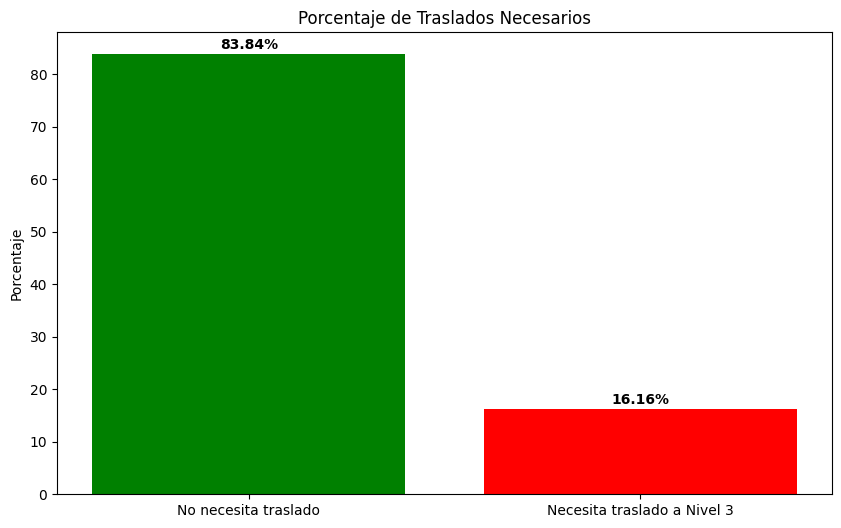

Porcentaje sin traslado: 83.83878691141261
Porcentaje traslado a nivel 3: 16.161213088587388


In [89]:
# Definir el nivel del hospital actual
nivel_hospital = 2

# Crear la función 'definir_traslado' con la lógica actualizada
def definir_traslado(nivel_necesario):
    if nivel_necesario <= nivel_hospital:
        return "No necesita traslado"  # No se necesita traslado
    elif nivel_necesario > nivel_hospital:
        return "Necesita traslado a Nivel 3"  # Traslado a un hospital de nivel 3
    return None  # Para casos donde el nivel no esté definido

# Aplicar la función para crear la columna 'Traslado'
tg_pitalito['Traslado'] = tg_pitalito['NiveldeAtencionNecesario'].apply(definir_traslado)

# Calcular los porcentajes de cada tipo de traslado
porcentaje_no_traslado = (tg_pitalito['Traslado'].value_counts(normalize=True).get("No necesita traslado", 0)) * 100
porcentaje_traslado_nivel_3 = (tg_pitalito['Traslado'].value_counts(normalize=True).get("Necesita traslado a Nivel 3", 0)) * 100

# Crear un DataFrame de comparación para visualización
comparacion_traslado = pd.DataFrame({
    'Categoria': ['No necesita traslado', 'Necesita traslado a Nivel 3'],
    'Porcentaje': [porcentaje_no_traslado, porcentaje_traslado_nivel_3]
})

# Gráfico de comparación de porcentajes de traslado
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(comparacion_traslado['Categoria'], comparacion_traslado['Porcentaje'], color=['green', 'red'])
ax.set_title('Porcentaje de Traslados Necesarios')
ax.set_ylabel('Porcentaje')

# Añadir etiquetas de porcentaje encima de cada barra
for i, v in enumerate(comparacion_traslado['Porcentaje']):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.show()

# Verificar la nueva columna y el porcentaje de traslados
print("Porcentaje sin traslado:", porcentaje_no_traslado)
print("Porcentaje traslado a nivel 3:", porcentaje_traslado_nivel_3)


In [90]:
tg_pitalito


,Ingreso,FechaIngreso,Servicio,Entidad,DxSindromatico,CodigoDiagnostico,NombreDiagnostico,Sexo,Edad,MunicipioRes,NivelHospital,tipo de identificación,NDocumento,NiveldeAtencionNecesario,Traslado
0,2795237,01/31/2023 11:23:22 PM,MEDICINA INTERNA,NUEVA EPS,CONTUSIONES,S019,"HERIDA DE LA CABEZA, PARTE NO ESPECIFICADA",Masculino,25,41551,2,CC,1467647276,2.0,No necesita traslado
1,2795236,01/31/2023 11:15:32 PM,CIRUGIA GENERAL,ASMET SALUD CONTRIBUTIVO,DOLOR ABDOMINAL CONSTANTE,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS,Femenino,36,41668,2,CC,8679097380,2.0,No necesita traslado
2,2795236,01/31/2023 11:15:32 PM,CIRUGIA GENERAL,ASMET SALUD CONTRIBUTIVO,DOLOR ABDOMINAL CONSTANTE,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS,Femenino,36,41668,2,CC,8679097380,2.0,No necesita traslado
3,2795236,01/31/2023 11:15:32 PM,CIRUGIA GENERAL,ASMET SALUD CONTRIBUTIVO,DOLOR ABDOMINAL CONSTANTE,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS,Femenino,36,41668,2,CC,8679097380,2.0,No necesita traslado
4,2795236,01/31/2023 11:15:32 PM,CIRUGIA GENERAL,ASMET SALUD CONTRIBUTIVO,DOLOR ABDOMINAL CONSTANTE,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS,Femenino,36,41668,2,CC,8679097380,2.0,No necesita traslado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793715,2999652,12/22/2023 03:37:21 PM,OFTALMOLOGIA,E.P.S. SANITAS CONTRIBUTIVO.,PERDIDA SUBITA DE VISION,H545,VISION SUBNORMAL DE UN OJO,Masculino,33,41006,2,CC,8465610276,3.0,Necesita traslado a Nivel 3
4793716,2999652,12/22/2023 03:37:21 PM,OFTALMOLOGIA,E.P.S. SANITAS CONTRIBUTIVO.,PERDIDA SUBITA DE VISION,H545,VISION SUBNORMAL DE UN OJO,Masculino,33,41006,2,CC,8465610276,3.0,Necesita traslado a Nivel 3
4793717,2974391,10/12/2023 10:07:42 AM,PEDIATRIA,E.P.S. SANITAS CONTRIBUTIVO.,DOLOR ABDOMINAL CON DIARREA Y DHT,P920,VOMITOS DEL RECIEN NACIDO,Masculino,1,41551,2,TI,8373356987,2.0,No necesita traslado
4793718,2989255,11/04/2023 09:27:52 AM,PEDIATRIA,NUEVA EPS,VOMITO SIN SANGRE,P920,VOMITOS DEL RECIEN NACIDO,Masculino,4,41551,2,TI,2781138687,2.0,No necesita traslado


Ahora para mantener un formato constante, se asigna un orden a el dataset, que sera posteriormente asignado al resto de datasets

In [92]:
orden_columnas = [
    'tipo de identificación',
    'NDocumento',
    'Sexo',
    'Edad',
    'MunicipioRes',
    'Ingreso',
    'FechaIngreso',
    'Entidad',
    'CodigoDiagnostico',
    'NombreDiagnostico',
    'DxSindromatico',
    'NiveldeAtencionNecesario',
    'Servicio',
    'NivelHospital',
    'Traslado'
]
# Reordenar el DataFrame tg_pitalito con el nuevo orden de columnas
tg_pitalito = tg_pitalito[orden_columnas]
tg_pitalito

,tipo de identificación,NDocumento,Sexo,Edad,MunicipioRes,Ingreso,FechaIngreso,Entidad,CodigoDiagnostico,NombreDiagnostico,DxSindromatico,NiveldeAtencionNecesario,Servicio,NivelHospital,Traslado
0,CC,1467647276,Masculino,25,41551,2795237,01/31/2023 11:23:22 PM,NUEVA EPS,S019,"HERIDA DE LA CABEZA, PARTE NO ESPECIFICADA",CONTUSIONES,2.0,MEDICINA INTERNA,2,No necesita traslado
1,CC,8679097380,Femenino,36,41668,2795236,01/31/2023 11:15:32 PM,ASMET SALUD CONTRIBUTIVO,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS,DOLOR ABDOMINAL CONSTANTE,2.0,CIRUGIA GENERAL,2,No necesita traslado
2,CC,8679097380,Femenino,36,41668,2795236,01/31/2023 11:15:32 PM,ASMET SALUD CONTRIBUTIVO,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS,DOLOR ABDOMINAL CONSTANTE,2.0,CIRUGIA GENERAL,2,No necesita traslado
3,CC,8679097380,Femenino,36,41668,2795236,01/31/2023 11:15:32 PM,ASMET SALUD CONTRIBUTIVO,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS,DOLOR ABDOMINAL CONSTANTE,2.0,CIRUGIA GENERAL,2,No necesita traslado
4,CC,8679097380,Femenino,36,41668,2795236,01/31/2023 11:15:32 PM,ASMET SALUD CONTRIBUTIVO,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS,DOLOR ABDOMINAL CONSTANTE,2.0,CIRUGIA GENERAL,2,No necesita traslado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793715,CC,8465610276,Masculino,33,41006,2999652,12/22/2023 03:37:21 PM,E.P.S. SANITAS CONTRIBUTIVO.,H545,VISION SUBNORMAL DE UN OJO,PERDIDA SUBITA DE VISION,3.0,OFTALMOLOGIA,2,Necesita traslado a Nivel 3
4793716,CC,8465610276,Masculino,33,41006,2999652,12/22/2023 03:37:21 PM,E.P.S. SANITAS CONTRIBUTIVO.,H545,VISION SUBNORMAL DE UN OJO,PERDIDA SUBITA DE VISION,3.0,OFTALMOLOGIA,2,Necesita traslado a Nivel 3
4793717,TI,8373356987,Masculino,1,41551,2974391,10/12/2023 10:07:42 AM,E.P.S. SANITAS CONTRIBUTIVO.,P920,VOMITOS DEL RECIEN NACIDO,DOLOR ABDOMINAL CON DIARREA Y DHT,2.0,PEDIATRIA,2,No necesita traslado
4793718,TI,2781138687,Masculino,4,41551,2989255,11/04/2023 09:27:52 AM,NUEVA EPS,P920,VOMITOS DEL RECIEN NACIDO,VOMITO SIN SANGRE,2.0,PEDIATRIA,2,No necesita traslado


# DATASET PASTO NIVEL 1

In [81]:
df_pasto


,IPS,FechaAsignacionRegistro,Sexo,Edad,Hora_Salida,Objeto_Remision,Impresiones_Diagnosticas,NivelHospital,NiveldeAtencionNecesario,Traslado,RangoEdad,CodigoDiagnostico,Nombre Diagnostico
0,CS LORENZO,01/07/2020 11:20:00 AM,M,70,11:15,OTRO,Diagnóstico Pincipal: K069 - TRASTORNO NO ESPE...,1,NaN,NaN,3,K069,TRASTORNO NO ESPECIFI
1,CS OBONUCO,01/07/2020 11:22:00 AM,M,24,11:16,OTRO,Diagnóstico Pincipal: K047 - ABSCESO PERIAPICA...,1,NaN,NaN,2,K047,ABSCESO PERIAPICAL SI
2,CS ENCANO,01/07/2020 11:25:00 AM,F,37,11:24,MEDICINA INTERNA,Diagnóstico Pincipal: I443 - OTROS TIPOS DE BL...,1,2.0,Traslado a Nivel 2,2,I443,OTROS TIPOS DE BLOQUE
3,CS TAMASAGRA,01/07/2020 11:28:00 AM,F,3,11:26,PEDIATRIA,Diagnóstico Pincipal: E45X - RETARDO DEL DESAR...,1,2.0,Traslado a Nivel 2,1,E45X,RETARDO DEL DESARROLL
4,CS TAMASAGRA,01/07/2020 11:31:00 AM,M,55,11:28,ORTOPEDIA,Diagnóstico Pincipal: M751 - SINDROME DE MANGUITO,1,2.0,Traslado a Nivel 2,3,M751,SINDROME DE MANGUITO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30167,CS OBONUCO,01/20/2020 10:41:00 AM,F,53,10:40,MEDICINA INTERNA,Diagnóstico Pincipal: E119 - DIABETES MELLITUS NO,1,2.0,Traslado a Nivel 2,3,E119,DIABETES MELLITUS NO
30168,CS OBONUCO,01/20/2020 10:43:00 AM,F,53,10:41,OFTALMOLOGIA,Diagnóstico Pincipal: E119 - DIABETES MELLITUS NO,1,3.0,Traslado a Nivel 3,3,E119,DIABETES MELLITUS NO
30169,CS SAN VICENTE,01/20/2020 10:43:00 AM,M,22,10:41,DERMATOLOGIA,Diagnóstico Pincipal: L910 - CICATRIZ QUELOIDE ;,1,3.0,Traslado a Nivel 3,2,L910,CICATRIZ QUELOIDE ;
30170,CS PROGRESO,01/20/2020 10:44:00 AM,F,91,10:42,NEFROLOGIA,Diagnóstico Pincipal: N189 - INSUFICIENCIA REN...,1,3.0,Traslado a Nivel 3,3,N189,INSUFICIENCIA RENAL C


## Normalizacion de Los DATOS

PARA NORMALIZAR EL DATASET HACEMOS EL MISMO PROCESO ELIMINAMOS LOS DATOS QUE NO SON NECESARIOS POR AHORA PARA LA INTEROPERABILIDAD

In [94]:
# Cambiar el nombre de la columna 'Objeto_Remision' a 'Servicio' en el DataFrame tg_pitalito
df_pasto.rename(columns={'Objeto_Remision': 'Servicio'}, inplace=True)


CREAMOS LOS ATRIBUTOS TIPO DE DOC, CEDULA, CODIGO DE INGRESO

### tipo de identificación

In [96]:
# Define las condiciones para cada tipo de identificación en función de la edad
conditions = [
    (df_pasto['Edad'] < 18),  # Menores de 18 años
    (df_pasto['Edad'] >= 18)  # Mayores de 18 años
]

# Define los valores que correspondan a cada condición
choices = ['TI', 'CC']

# Crea la nueva columna usando np.select
df_pasto['tipo de identificación'] = np.select(conditions, choices, default='Desconocido')

# Muestra las primeras filas para verificar
print(df_pasto[['Edad', 'tipo de identificación']].head())


   Edad tipo de identificación
0    70                     CC
1    24                     CC
2    37                     CC
3     3                     TI
4    55                     CC


### NDocumento

Creamos numeros de documentos para simular la identidad de pacientes

In [97]:
# Generar una lista de números únicos de 10 dígitos con la misma cantidad de filas que el DataFrame
n_documentos = random.sample(range(1000000000, 9999999999), len(df_pasto))

# Asignar la lista generada a la nueva columna 'NDocumento'
df_pasto['NDocumento'] = n_documentos

# Muestra las primeras filas para verificar
print(df_pasto[['NDocumento']].head())

   NDocumento
0  8018647446
1  1328597068
2  6832576928
3  2663005260
4  6616117377


### cdIngreso

Hacemos numeros aleatoros de 7 digitos para asignar un codigo a cada Historia clinica

In [98]:
# Generar una lista de números únicos de 7 dígitos con la misma cantidad de filas que el DataFrame para el codigo de ingreso
n_ingreso = random.sample(range(1000000000, 9999999999), len(df_pasto))

# Asignar la lista generada a la nueva columna 'cdIngreso'
df_pasto['cdIngreso'] = n_documentos

# Muestra las primeras filas para verificar
print(df_pasto[['cdIngreso']].head())

    cdIngreso
0  8018647446
1  1328597068
2  6832576928
3  2663005260
4  6616117377


### Eliminacion de Columnas

In [99]:
df_pasto

,IPS,FechaAsignacionRegistro,Sexo,Edad,Hora_Salida,Servicio,Impresiones_Diagnosticas,NivelHospital,NiveldeAtencionNecesario,Traslado,RangoEdad,CodigoDiagnostico,Nombre Diagnostico,tipo de identificación,NDocumento,cdIngreso
0,CS LORENZO,01/07/2020 11:20:00 AM,M,70,11:15,OTRO,Diagnóstico Pincipal: K069 - TRASTORNO NO ESPE...,1,NaN,NaN,3,K069,TRASTORNO NO ESPECIFI,CC,8018647446,8018647446
1,CS OBONUCO,01/07/2020 11:22:00 AM,M,24,11:16,OTRO,Diagnóstico Pincipal: K047 - ABSCESO PERIAPICA...,1,NaN,NaN,2,K047,ABSCESO PERIAPICAL SI,CC,1328597068,1328597068
2,CS ENCANO,01/07/2020 11:25:00 AM,F,37,11:24,MEDICINA INTERNA,Diagnóstico Pincipal: I443 - OTROS TIPOS DE BL...,1,2.0,Traslado a Nivel 2,2,I443,OTROS TIPOS DE BLOQUE,CC,6832576928,6832576928
3,CS TAMASAGRA,01/07/2020 11:28:00 AM,F,3,11:26,PEDIATRIA,Diagnóstico Pincipal: E45X - RETARDO DEL DESAR...,1,2.0,Traslado a Nivel 2,1,E45X,RETARDO DEL DESARROLL,TI,2663005260,2663005260
4,CS TAMASAGRA,01/07/2020 11:31:00 AM,M,55,11:28,ORTOPEDIA,Diagnóstico Pincipal: M751 - SINDROME DE MANGUITO,1,2.0,Traslado a Nivel 2,3,M751,SINDROME DE MANGUITO,CC,6616117377,6616117377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30167,CS OBONUCO,01/20/2020 10:41:00 AM,F,53,10:40,MEDICINA INTERNA,Diagnóstico Pincipal: E119 - DIABETES MELLITUS NO,1,2.0,Traslado a Nivel 2,3,E119,DIABETES MELLITUS NO,CC,7725970760,7725970760
30168,CS OBONUCO,01/20/2020 10:43:00 AM,F,53,10:41,OFTALMOLOGIA,Diagnóstico Pincipal: E119 - DIABETES MELLITUS NO,1,3.0,Traslado a Nivel 3,3,E119,DIABETES MELLITUS NO,CC,7084547205,7084547205
30169,CS SAN VICENTE,01/20/2020 10:43:00 AM,M,22,10:41,DERMATOLOGIA,Diagnóstico Pincipal: L910 - CICATRIZ QUELOIDE ;,1,3.0,Traslado a Nivel 3,2,L910,CICATRIZ QUELOIDE ;,CC,6368068495,6368068495
30170,CS PROGRESO,01/20/2020 10:44:00 AM,F,91,10:42,NEFROLOGIA,Diagnóstico Pincipal: N189 - INSUFICIENCIA REN...,1,3.0,Traslado a Nivel 3,3,N189,INSUFICIENCIA RENAL C,CC,2422367141,2422367141


# DATASET NEIVA NIVEL 3

In [82]:
# Read dataset

# URL base de la API
base_url5='https://www.datos.gov.co/resource/5c4n-qdbv.csv'

# Parámetros para paginación
limit = 1000  # Máximo número de filas por consulta
offset = 0  # Iniciar desde la primera fila
all_data = []  # Lista para almacenar los bloques de datos

# Bucle para descargar el dataset completo
while True:
    # Configurar los parámetros para la consulta
    params = {
        '$limit': limit,
        '$offset': offset
    }

    # Realizar la solicitud a la API con paginación
    response = requests.get(base_url5, params=params)

    # Convertir la respuesta a texto y luego a DataFrame
    data = pd.read_csv(io.StringIO(response.text))

    # Si el bloque de datos está vacío, hemos llegado al final
    if data.empty:
        break

    # Agregar el bloque de datos a la lista
    all_data.append(data)

    # Aumentar el offset para el siguiente bloque
    offset += limit

# Combinar todos los bloques en un solo DataFrame
tg_neiva = pd.concat(all_data, ignore_index=True)

# Muestra la base de datos
tg_neiva

,cidigo_cie_10,nombre_del_diagnostico,unidad_funcional,destino_al_egreso,edad_de_atencion_a_os,a_o_reportado
0,A000,"COLERA DEBIDO A VIBRIO CHOLERAE O1, BIOTIPO CH...",CONSULTA EXTERNA,SALIDA,39,2017
1,A000,"COLERA DEBIDO A VIBRIO CHOLERAE O1, BIOTIPO CH...",CONSULTA EXTERNA,SALIDA,44,2017
2,A010,FIEBRE TIFOIDEA,CONSULTA EXTERNA,SALIDA,28,2017
3,A010,FIEBRE TIFOIDEA,CONSULTA EXTERNA,SALIDA,76,2017
4,A010,FIEBRE TIFOIDEA,CONSULTA EXTERNA,SALIDA,50,2017
...,...,...,...,...,...,...
341691,G510,PARALISIS DE BELL,ATENCION INICIAL DE URGENCIAS ADULTOS,MEDICINA INTERNA,72,2023
341692,H571,DOLOR OCULAR,ATENCION INICIAL DE URGENCIAS ADULTOS,OFTALMOLOGIA,60,2023
341693,K528,OTRAS COLITIS Y GASTROENTERITIS NO INFECCIOSAS...,ATENCION INICIAL DE URGENCIAS ADULTOS,MEDICINA GENERAL,26,2023
341694,O200,AMENAZA DE ABORTO,SALA DE PARTOS,GINECOLOGIA,29,2023
